In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import make_regression

In [4]:
X,y=make_regression(n_samples=1000,n_features=2,noise=3,n_targets=1)

In [5]:
X

array([[-0.5971206 , -0.06875595],
       [ 0.75067205,  0.31949588],
       [ 0.55579459,  1.10306555],
       ...,
       [ 0.23867451,  2.72657975],
       [-0.31580984,  0.7457524 ],
       [-0.28849206, -0.82585557]])

In [6]:
y

array([-3.62030315e+01,  5.11686757e+01,  4.78523645e+01, -7.41126032e+01,
        6.69675254e+01,  3.83539948e+01,  7.34769748e+01,  9.74435901e+00,
        1.90556676e+01,  3.54172594e+01,  4.89499487e+01,  2.19501741e+01,
       -2.12208333e+01, -1.15531345e+01,  1.08326856e+01, -8.50357262e+01,
        1.28269431e+02,  2.68675513e+01, -3.95934250e+01, -9.04502097e+00,
        9.00763124e+00,  6.99765108e+01,  5.02888371e+01, -4.94981293e+01,
       -1.71490793e+01, -7.21280271e+01, -3.87805049e+00, -2.01472229e+01,
        6.36370554e+01, -2.51523339e+01, -3.51938485e+00, -9.72491876e+01,
       -3.40052774e+00, -2.26415201e+01, -1.14268353e+02,  6.92961967e+01,
        2.03565451e+01,  1.18480017e+02, -6.86489127e+01, -7.11218532e-01,
        9.02593972e+01,  9.55046014e+01, -6.72258320e+01, -2.54667027e+00,
        1.24379153e+01, -1.58104185e+01, -8.69747138e+01,  9.60504451e+01,
        8.84241100e+01, -3.34437201e+01,  1.98476395e+01,  1.18020913e+02,
        1.41573486e+02,  

<AxesSubplot: xlabel='0', ylabel='1'>

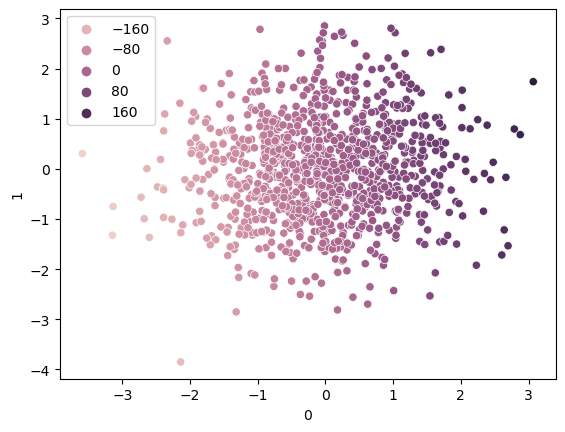

In [14]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [7]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [15]:
from sklearn.svm import SVR

In [18]:
svr=SVR(kernel='linear')

In [19]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [20]:
y_pred=svr.predict(X_test)

In [21]:
from sklearn.metrics import r2_score

In [22]:
result=r2_score(y_test,y_pred)

In [23]:
print(result)

0.9978947647308085


### Hyperparameter 

In [28]:
from sklearn.model_selection import GridSearchCV

In [25]:
parameter={
         'gamma':[1,0.1,0.01,0.001],
         'C':[1,10,100,1000],
         'epsilon': [0.1,0.2,0.3],
         'kernel': ['linear']

}

In [27]:
grcv=GridSearchCV(SVR(),param_grid=parameter,refit=True,cv=5,verbose=3)

In [29]:
grcv.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END C=1, epsilon=0.1, gamma=1, kernel=linear;, score=0.998 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.1, gamma=1, kernel=linear;, score=0.997 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=1, kernel=linear;, score=0.998 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=1, kernel=linear;, score=0.998 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=1, kernel=linear;, score=0.998 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.998 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.997 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.998 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.998 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.998 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.1, gamma=0.01, kernel=linear;,

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100, 1000], 'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear']},
             verbose=3)

In [30]:
y_pred=grcv.predict(X_test)

In [31]:
print(r2_score(y_test,y_pred))

0.9979170467653525
